[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TPouplin/RQR/blob/main/gradient_analysis.ipynb)

### This notebook reproduces the manual calculation of gradients used in the gradient analysis in Figure 2 of the text.
Run in Google Colab to easily obtain the (commented out) science plot requirements.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# # science plots requirements (uncomment for producing scientific plots on Google Colab)
# !apt-get update
# !sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super
# !pip install SciencePlots
# import matplotlib.pyplot as plt
# plt.style.reload_library()
# import scienceplots
# plt.style.use(['science'])

In [4]:
# manual calculation of gradients (and loss if desired)
def lossfn(u1, u2, y, tau=0.9, lam=0.1):
  R = (y - u1) * (y - u2)
  reg = 0.5 * lam * (u2 - u1)**2
  if R >= 0:
    return tau * R + reg
  else:
    return (tau - 1) * R + reg

def grad(u1, u2, y, tau=0.9, lam=0.1):
  R = (y - u1) * (y - u2)
  mult = tau if R >= 0 else tau - 1
  dLdu1 = -mult * (y - u2)
  dLdu2 = -mult * (y - u1)
  dRdu1 = -lam * (u2 - u1)
  dRdu2 = lam * (u2 - u1)
  return dLdu1 + dRdu1, dLdu2 + dRdu2


def calc_loss_grad(vals, u1, u2, tau, lam):
  # want coverage of e.g. tau = 0.9 with reg of 0.05
  # therefore \hat{tau} = 0.9 + 2 * 0.05 (see paper)
  tau_hat = tau + 2 * lam
  losses = []
  dLdu1s = []
  dLdu2s = []
  for val in vals:
    loss = lossfn(u1,u2,val)
    losses.append(loss)
    dLdu1, dLdu2 = grad(u1, u2, val, tau=tau_hat, lam = lam)
    dLdu1s.append(dLdu1)
    dLdu2s.append(dLdu2)
  return losses, dLdu1s, dLdu2s


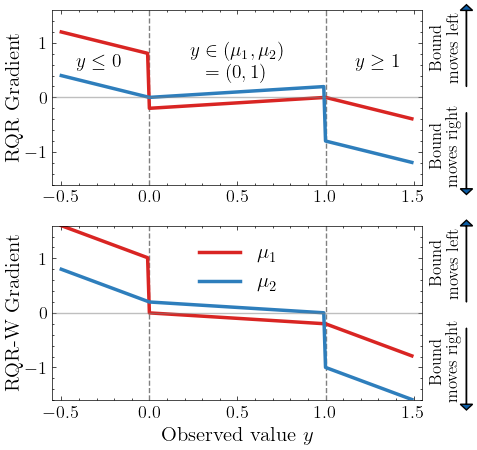

In [5]:
green = plt.cm.Greens(0.2*(6/4) + 0.4)
blue = plt.cm.Blues(0.2*(6/4) + 0.4)
red = plt.cm.Reds(0.2*(6/4) + 0.4)

# fixed params experiment
u1 = 0.; u2 = 1.

vals = np.arange(-0.5, 1.5, 0.01)
tau = 0.8

# params figure
FS = 14
LS = 15
LW = 2.5
TLS = 13
text_h = 0.65
arrow_H = 1.5


# calc no regularization
lam = 0.
_, dLdu1s, dLdu2s = calc_loss_grad(vals, u1, u2, tau, lam)

# make plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 4.7))

W = 0; H = -arrow_H
axes[0].arrow(1.8, -0.28, W, H, length_includes_head=True, head_width=0.07, clip_on=False)
axes[0].annotate('Bound\nmoves right',
             xy=(1.68+W/2, -0.15+H/2),
             xytext=(0, 0), fontsize = FS-2,
             textcoords='offset points', annotation_clip=False, rotation=90,ha='center',va='center')

W = 0; H = arrow_H
axes[0].arrow(1.8, 0.2, W, H, length_includes_head=True, head_width=0.07, clip_on=False)
axes[0].annotate('Bound\nmoves left',
             xy=(1.68+W/2, 0.15+H/2),
             xytext=(0, 0),fontsize = FS-2,
             textcoords='offset points', annotation_clip=False, rotation=90,ha='center',va='center')

axes[0].text(0.5,text_h,r'$y \in (\mu_1, \mu_2)$' + '\n' + r'$= (0, 1)$', ha='center', va='center', fontsize = FS)
axes[0].text(-0.16,text_h,r'$y \leq 0$', ha='right', va='center', fontsize = FS)
axes[0].text(1.17,text_h,r'$y \geq 1$', ha='left', va='center', fontsize = FS)
axes[0].set_xlim(-0.55, 1.55)
axes[0].set_ylim(-1.6, 1.6)
axes[0].set_ylabel('RQR Gradient', fontsize = LS, labelpad=1)
# axes[0].set_xlabel('Observed value y', fontsize = LS)
axes[0].axvline(x=-0., color='gray', linestyle='--')
axes[0].axvline(x=1., color='gray', linestyle='--')
axes[0].plot(vals, dLdu1s, c=red, label=r'$\mu_1$', linewidth=LW)
axes[0].plot(vals, dLdu2s, c=blue, label='$\mu_2$', linewidth=LW)
axes[0].axhline(y=0., color='gray', linestyle='-', alpha=0.5)
axes[0].tick_params(axis='both', which='major', labelsize=TLS)



# calc with regularization
lam = 0.2
_, dLdu1s, dLdu2s = calc_loss_grad(vals, u1, u2, tau, lam)

# make plot
W = 0; H = -arrow_H
axes[1].arrow(1.8, -0.28, W, H, length_includes_head=True, head_width=0.07, clip_on=False)
axes[1].annotate('Bound\nmoves right',
             xy=(1.68+W/2, -0.15+H/2),
             xytext=(0, 0), fontsize = FS-2,
             textcoords='offset points', annotation_clip=False, rotation=90,ha='center',va='center')

W = 0; H = arrow_H
axes[1].arrow(1.8, 0.2, W, H, length_includes_head=True, head_width=0.07, clip_on=False)
axes[1].annotate('Bound\nmoves left',
             xy=(1.68+W/2, 0.15+H/2),
             xytext=(0, 0),fontsize = FS-2,
             textcoords='offset points', annotation_clip=False, rotation=90,ha='center',va='center')

axes[1].set_xlim(-0.55, 1.55)
axes[1].set_ylim(-1.6, 1.6)
axes[1].set_ylabel('RQR-W Gradient', fontsize = LS, labelpad=1)
axes[1].set_xlabel(r'Observed value $y$', fontsize = LS)
axes[1].axvline(x=-0., color='gray', linestyle='--')
axes[1].axvline(x=1., color='gray', linestyle='--')
axes[1].plot(vals, dLdu1s, c=red, label=r'$\mu_1$', linewidth=LW)
axes[1].plot(vals, dLdu2s, c=blue, label='$\mu_2$', linewidth=LW)
axes[1].axhline(y=0., color='gray', linestyle='-', alpha=0.5)
axes[1].tick_params(axis='both', which='major', labelsize=TLS)

axes[1].legend(fontsize = FS+1, loc='upper center')


plt.tight_layout()
plt.savefig('gradients.pdf', dpi=800)
plt.show()